# Problem Statment : To make prediction on car pricr based on features 

## 1. Import libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

## 2. Data Collection

In [108]:
df = pd.read_csv('E:/ML_Datasets/CarPrice_Assignment.csv')

In [109]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [110]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [111]:
df.shape

(205, 26)

In [112]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


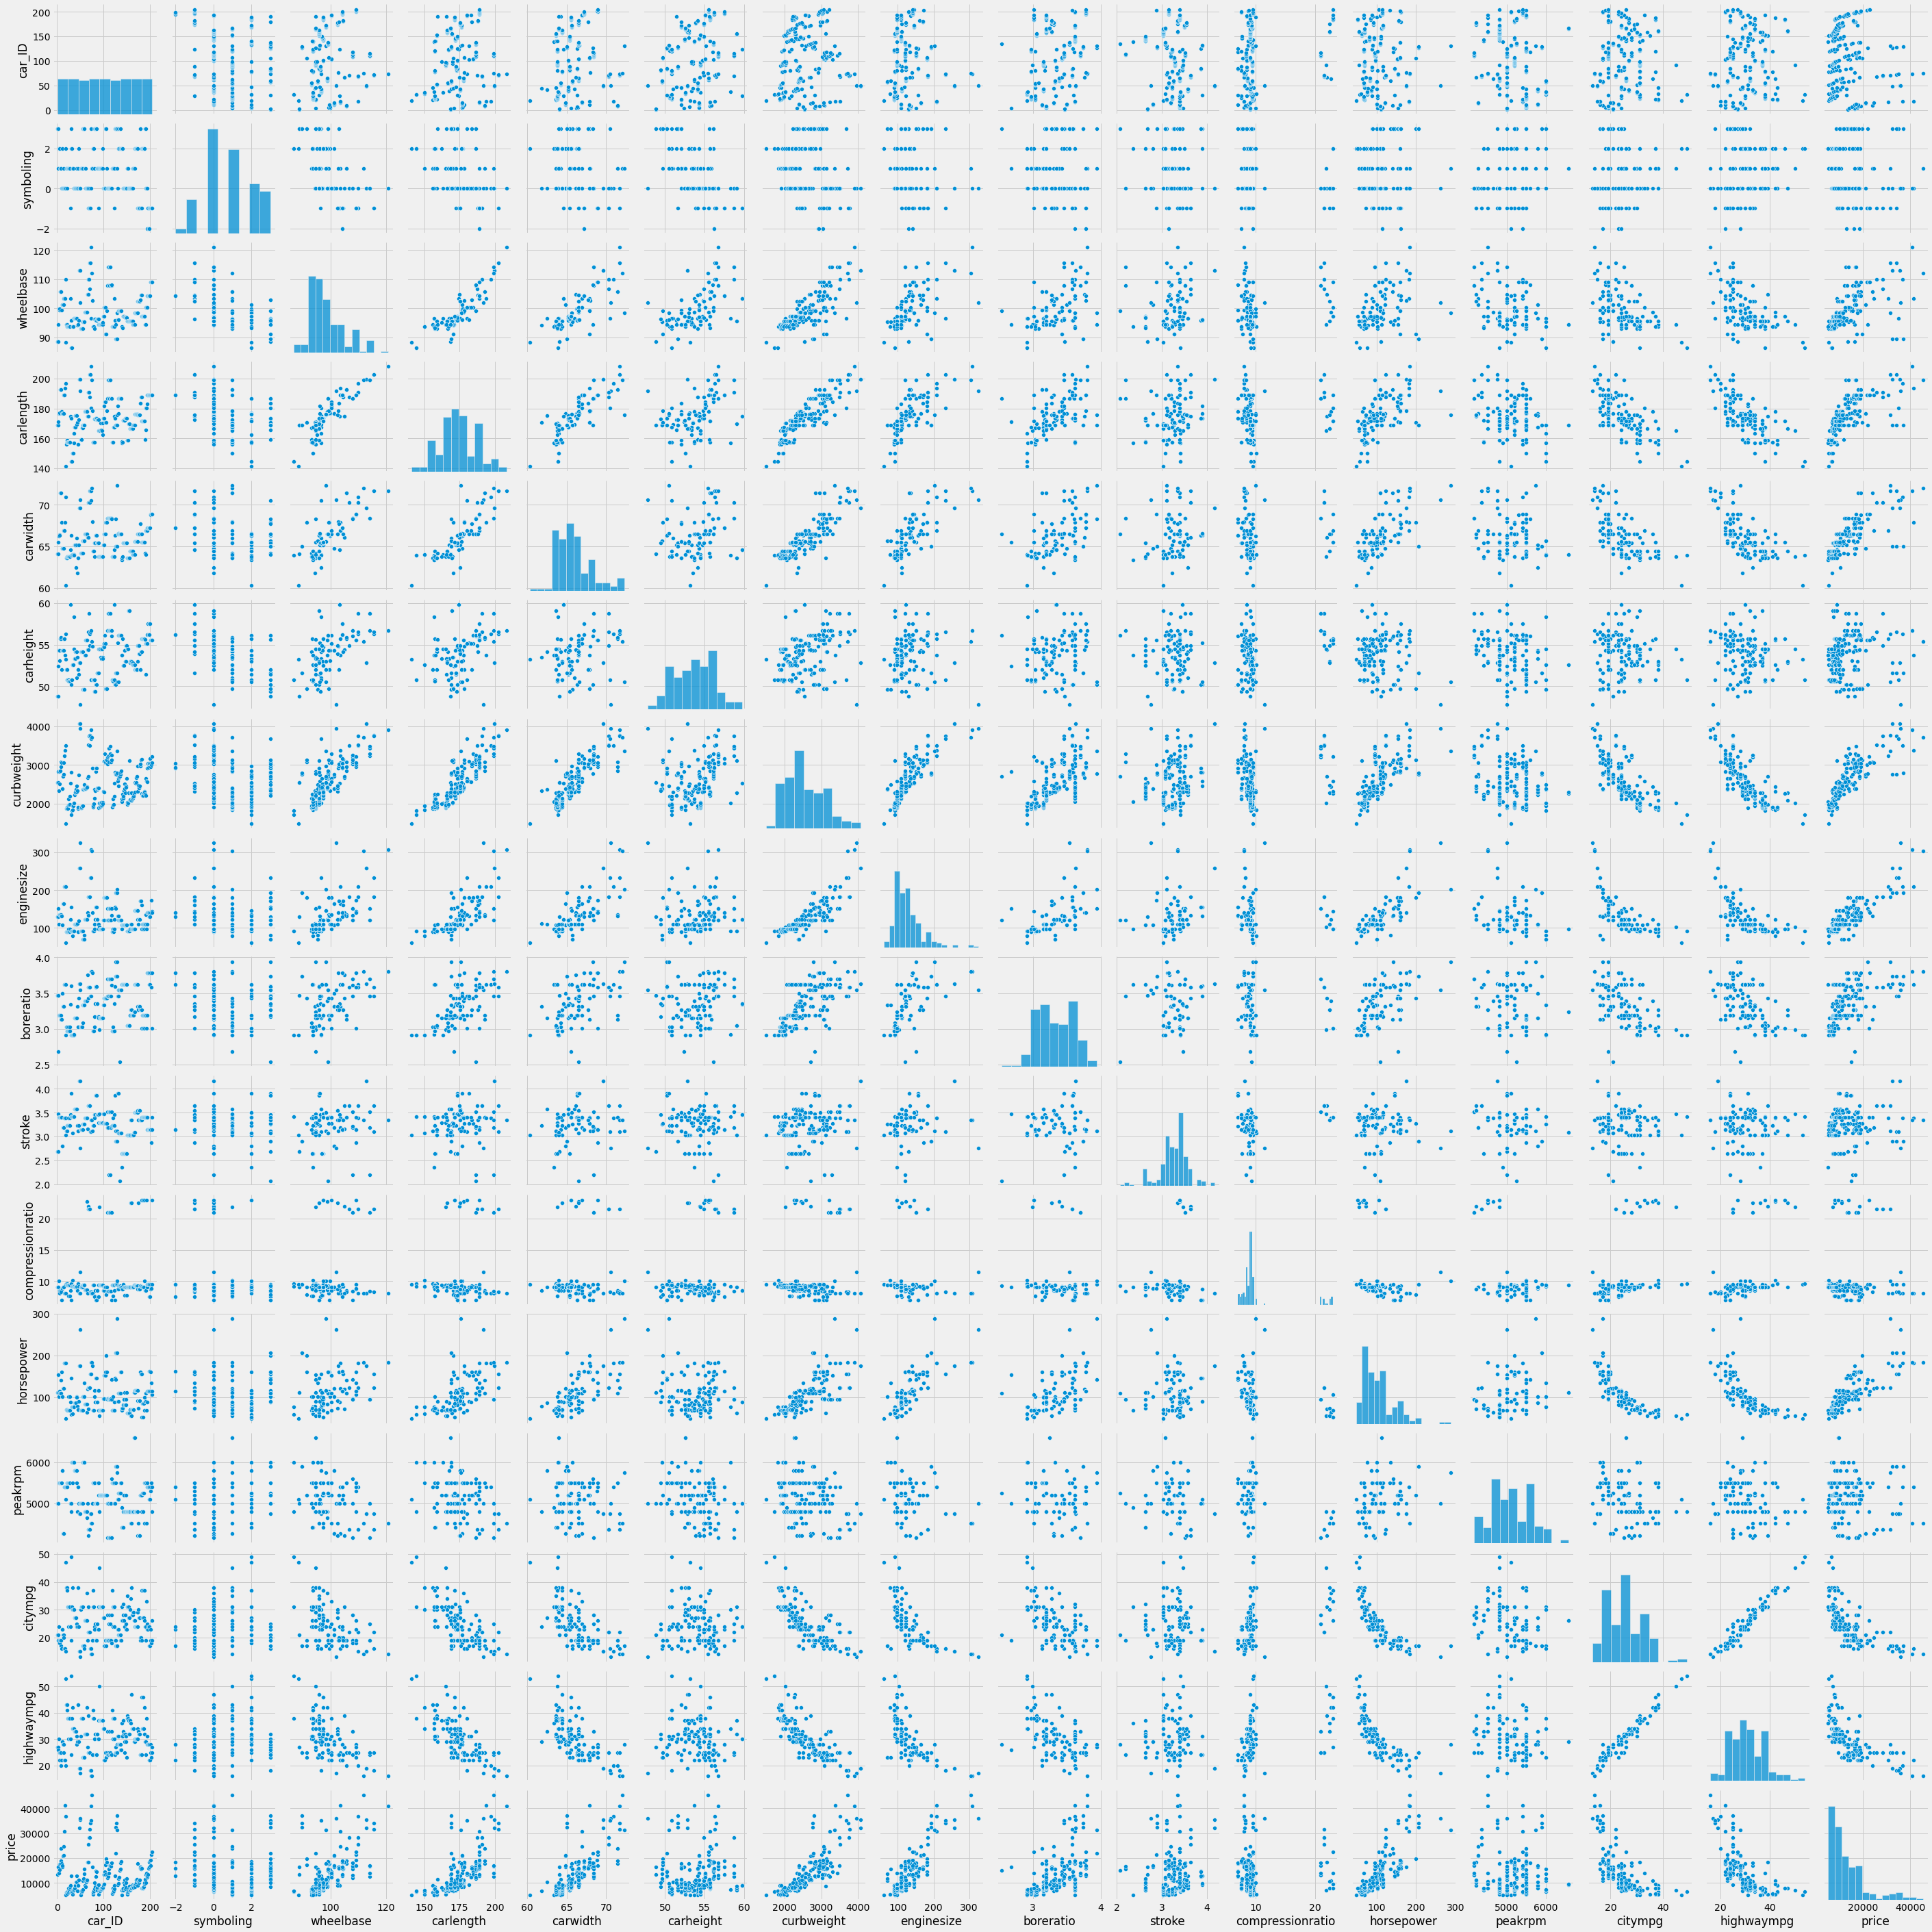

In [113]:
## check relation of input variables with output variable
sns.pairplot(df)

### LabelEncoder for encoding means convert string into int values

In [114]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['CarName'] = label.fit_transform(df['CarName'])
df['fueltype'] = label.fit_transform(df['fueltype'])
df['aspiration'] = label.fit_transform(df['aspiration'])
df['doornumber'] = label.fit_transform(df['doornumber'])
df['carbody'] = label.fit_transform(df['carbody'])
df['drivewheel'] = label.fit_transform(df['drivewheel'])
df['enginelocation'] = label.fit_transform(df['enginelocation'])
df['enginetype'] = label.fit_transform(df['enginetype'])
df['cylindernumber'] = label.fit_transform(df['cylindernumber'])
df['fuelsystem'] = label.fit_transform(df['fuelsystem'])

In [115]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0


## Data splitting for RandomForest model

In [116]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [117]:
x.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27


In [118]:
y.head(2)

0    13495.0
1    16500.0
Name: price, dtype: float64

In [119]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [120]:
x_scaled = pd.DataFrame(x_scaled , columns = df.columns[:-1])
x_scaled.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.723622,1.74347,-1.838221,0.328798,-0.469295,1.130388,-3.050975,1.21333,-0.121867,-1.690772,...,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.26296,-0.646553,-0.546059
1,-1.706724,1.74347,-1.813780,0.328798,-0.469295,1.130388,-3.050975,1.21333,-0.121867,-1.690772,...,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.26296,-0.646553,-0.546059


In [121]:
print(df.dtypes)

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


## Split data into train and test for RandomForest model

In [122]:
x_train ,x_test , y_train ,y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)

## RandomForest model for to calculate score of features . from that score we have to understand selection of features

In [123]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=0)

In [124]:
model

RandomForestRegressor(random_state=0)

In [125]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [126]:
y_pred = model.predict(x_test)

In [127]:
y_pred

array([36161.175, 19332.28 ,  8957.67 , 12843.6  , 28177.62 ,  6587.31 ,
        7941.35 ,  8062.33 ,  9384.33 ,  8371.25 , 13786.08 ,  7979.21 ,
       13711.19 , 10676.19 , 40072.695,  6340.7  ,  5898.065, 13921.72 ,
        8408.35 ,  8966.17 , 10117.16 , 14964.27 ,  6569.15 ,  5869.865,
        7193.315, 36136.935,  9287.6  , 16772.4  ,  7353.01 , 16328.93 ,
       28346.575,  6469.07 ,  8159.34 , 19105.55 ,  8098.955, 28343.1  ,
       10063.97 , 12362.02 ,  7525.32 , 14386.15 ,  8223.61 ])

In [128]:
## MSE

In [129]:
MSE = mean_squared_error(y_test , y_pred)

In [130]:
MSE

3425366.3596333927

In [131]:
## RMSE
RMSE = np.sqrt(MSE)

In [132]:
RMSE

1850.774529658703

In [133]:
results = []

for i in x_test :
    x_test_copy = x_test.copy()
    x_test_copy[i] = x_test[i].sample(frac =1).values
    new_mse = mean_squared_error(y_test , model.predict(x_test_copy))
    new_rmse = np.sqrt(new_mse)
    results.append({'pred':i,
                    'score': new_rmse - RMSE})
    
    
resultsdf = pd.DataFrame(results).sort_values(by ='score',ascending = False)
    

## score of features 

In [134]:
resultsdf

,pred,score
16,enginesize,6214.357307
13,curbweight,1539.047460
24,highwaympg,246.781800
20,compressionratio,129.282713
11,carwidth,65.832247
19,stroke,59.766735
0,car_ID,47.290835
9,wheelbase,38.791608
18,boreratio,35.015122
22,peakrpm,29.466723


## Feature Importance Plot

Text(0.5, 1.0, 'Feature importance plot')

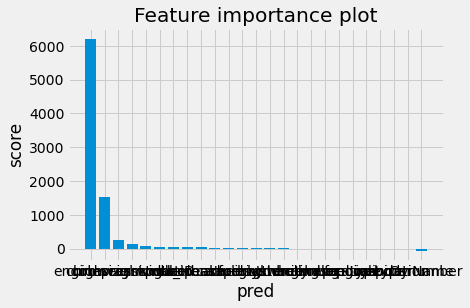

In [135]:
plt.bar(resultsdf['pred'],resultsdf['score'])
plt.xlabel('pred')
plt.ylabel('score')
plt.title('Feature importance plot')


## Data split into dependent and independent for LinearRegression model

In [136]:
X = df.loc[:,['enginesize','curbweight']]
Y = df.iloc[:,-1]

In [137]:
X.head(2)

,enginesize,curbweight
0,130,2548
1,130,2548


In [138]:
Y.head(2)

0    13495.0
1    16500.0
Name: price, dtype: float64

## Data split into train and test  for LinearRegression model

In [139]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

In [140]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [141]:
model1.fit(X_train , Y_train)

LinearRegression()

In [142]:
training_accuracy = model1.score(X_train ,Y_train)

In [143]:
training_accuracy

0.7838886280001216

In [144]:
testing_accuracy = model1.score(X_test ,Y_test)

In [145]:
testing_accuracy

0.8264691761307672

In [146]:
Y_pred = model1.predict(X_test)

In [147]:
Y_pred

array([25917.17781276, 16233.73889985, 11222.56927832, 13122.85528542,
       25596.61740684,  7253.46399886,  9959.47313183,  7928.58657613,
       10637.77726274,  8423.39465111, 14829.20594524,  8249.94091838,
       15325.40631296, 12010.44433393, 40443.85143834,  6624.42650641,
         482.94751606, 17947.89530673, 11965.25387955, 10060.34367901,
       11990.35968754, 22082.2516037 ,  7153.0407669 ,  5108.03570392,
        6268.3713482 , 26670.35205241, 15329.08552888, 17265.86161284,
        7298.65445323, 16653.27989793, 24416.64443139,  6157.90579305,
        8005.24594577, 20763.47536441,  7953.69238412, 24316.22119943,
       10913.94115062,  5976.59596619,  5866.67842039, 18414.86333532,
        9809.28559913])

In [148]:
y_test , pd.DataFrame(Y_pred ,columns = (['prediction_output']))

(15     30760.000
 9      17859.167
 100     9549.000
 132    11850.000
 68     28248.000
 95      7799.000
 159     7788.000
 162     9258.000
 147    10198.000
 182     7775.000
 191    13295.000
 164     8238.000
 65     18280.000
 175     9988.000
 73     40960.000
 152     6488.000
 18      5151.000
 82     12629.000
 86      8189.000
 143     9960.000
 60      8495.000
 101    13499.000
 98      8249.000
 30      6479.000
 25      6692.000
 16     41315.000
 168     9639.000
 195    13415.000
 97      7999.000
 194    12940.000
 67     25552.000
 120     6229.000
 154     7898.000
 202    21485.000
 79      7689.000
 69     28176.000
 145    11259.000
 55     10945.000
 45      8916.500
 84     14489.000
 146     7463.000
 Name: price, dtype: float64,
     prediction_output
 0        25917.177813
 1        16233.738900
 2        11222.569278
 3        13122.855285
 4        25596.617407
 5         7253.463999
 6         9959.473132
 7         7928.586576
 8        10637.777263
 9

In [149]:
mse = mean_squared_error(Y_test , Y_pred)

In [150]:
mse

13699220.982796913

In [151]:
RMSE = np.sqrt(mse)

In [152]:
RMSE

3701.2458690009926

In [153]:
R2 = r2_score(Y_test ,Y_pred)

In [154]:
R2

0.8264691761307672

### 3d plot for multiple linear regression visualization

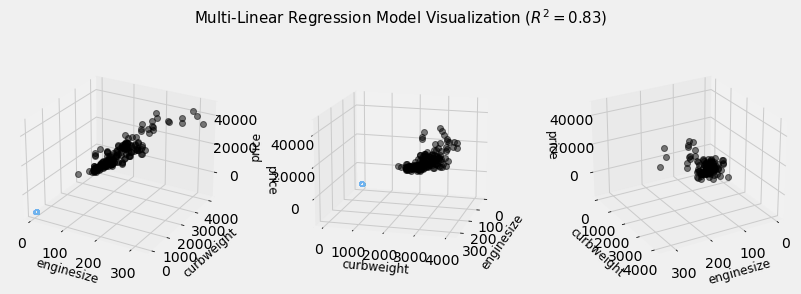

In [155]:
# Prepare data
X = df[['enginesize', 'curbweight']].values.reshape(-1,2)
Y = df['price']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model1.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = r2_score(Y_test, Y_pred)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('enginesize', fontsize=12)
    ax.set_ylabel('curbweight', fontsize=12)
    ax.set_zlabel('price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()